In [0]:
# Databricks notebook source
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load cleaned dataset
df_read = pd.read_csv("/Volumes/workspace/default/netflix/netflix_cleaned.csv")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

display(df_read)



show_id type title director cast country date_added release_year rating duration listed_in description duration_type s1 Movie Dick Johnson Is Dead Kirsten Johnson Not Available United States September 25, 2021 2020 PG-13 90 min Documentaries As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable. min s2 TV Show Blood & Water Not Available Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng South Africa September 24, 2021 2021 TV-MA 2 Seasons International TV Shows, TV Dramas, TV Mysteries After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth. Season s3 TV Show Ganglands Julien Leclercq Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera Unknown September 24, 2021 2021 TV-MA 1 Season Crime TV Shows, International TV Shows, TV Action & Adventure To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war. Season s4 TV Show Jailbirds New Orleans Not Available Not Available Unknown September 24, 2021 2021 TV-MA 1 Season Docuseries, Reality TV Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series. Season s5 TV Show Kota Factory Not Available Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar India September 24, 2021 2021 TV-MA 2 Seasons International TV Shows, Romantic TV Shows, TV Comedies In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life. Season s6 TV Show Midnight Mass Mike Flanagan Kate Siegel, Zach Gilford, Hamish Linklater, Henry Thomas, Kristin Lehman, Samantha Sloyan, Igby Rigney, Rahul Kohli, Annarah Cymone, Annabeth Gish, Alex Essoe, Rahul Abburi, Matt Biedel, Michael Trucco, Crystal Balint, Louis Oliver Unknown September 24, 2021 2021 TV-MA 1 Season TV Dramas, TV Horror, TV Mysteries The arrival of a charismatic young priest brings glorious miracles, ominous mysteries and renewed religious fervor to a dying town desperate to believe. Season s7 Movie My Little Pony: A New Generation Robert Cullen, José Luis Ucha Vanessa Hudgens, Kimiko Glenn, James Marsden, Sofia Carson, Liza Koshy, Ken Jeong, Elizabeth Perkins, Jane Krakowski, Michael McKean, Phil LaMarr Unknown September 24, 2021 2021 PG 91 min Children & Family Movies Equestria's divided. But a bright-eyed hero believes Earth Ponies, Pegasi and Unicorns should be pals — and, hoof to heart, she’s determined to prove it. min s8 Movie Sankofa Haile Gerima Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra Duah, Nick Medley, Mutabaruka, Afemo Omilami, Reggie Carter, Mzuri United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia September 24, 2021 1993 TV-MA 125 min Dramas, Independent Movies, International Movies On a photo shoot in Ghana, an American model slips back in time, becomes enslaved on a plantation and bears witness to the agony of her ancestral past. min s9 TV Show The Great British Baking Show Andy Devonshire Mel Giedroyc, Sue Perkins, Mary Berry, Paul Hollywood United Kingdom September 24, 2021 2021 TV-14 9 Seasons British TV Shows, Reality TV A talented batch of amateur bakers face off in a 10-week competition, whipping up their best dishes in the hopes of being named the U.K.'s best. Season s10 Movie The Starling Theodore Melfi Melissa McCarthy, Chris O'Dowd, Kevin Kline, Timothy Olyphant, Dave

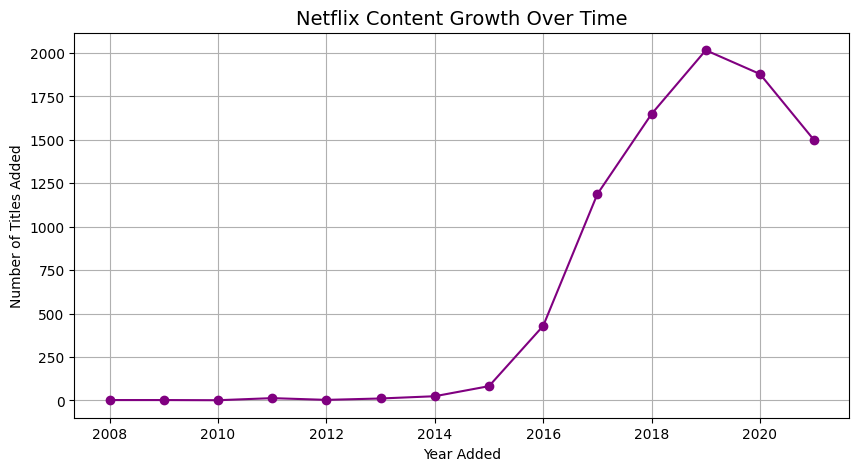

In [0]:

# Netflix Content Growth Over Time

# Convert date_added to datetime
df_read['date_added'] = pd.to_datetime(df_read['date_added'], errors='coerce')

# Extract year from date_added
df_read['year_added'] = df_read['date_added'].dt.year

# Count titles added per year
content_growth = df_read['year_added'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,5))
plt.plot(content_growth.index, content_growth.values, marker='o', color='purple')
plt.title("Netflix Content Growth Over Time", fontsize=14)
plt.xlabel("Year Added")
plt.ylabel("Number of Titles Added")
plt.grid(True)
plt.show()


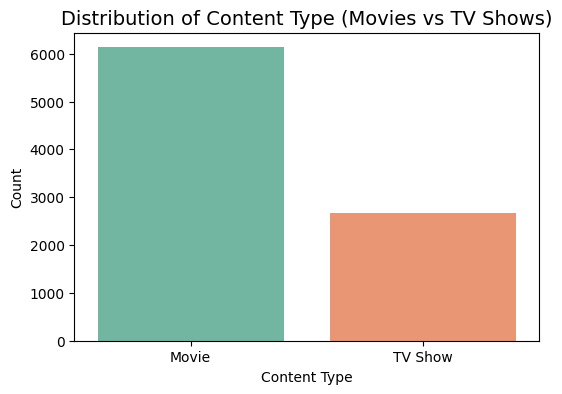

In [0]:
#content type distribution
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df_read, hue='type', palette='Set2', legend=False)
plt.title('Distribution of Content Type (Movies vs TV Shows)', fontsize=14)
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()


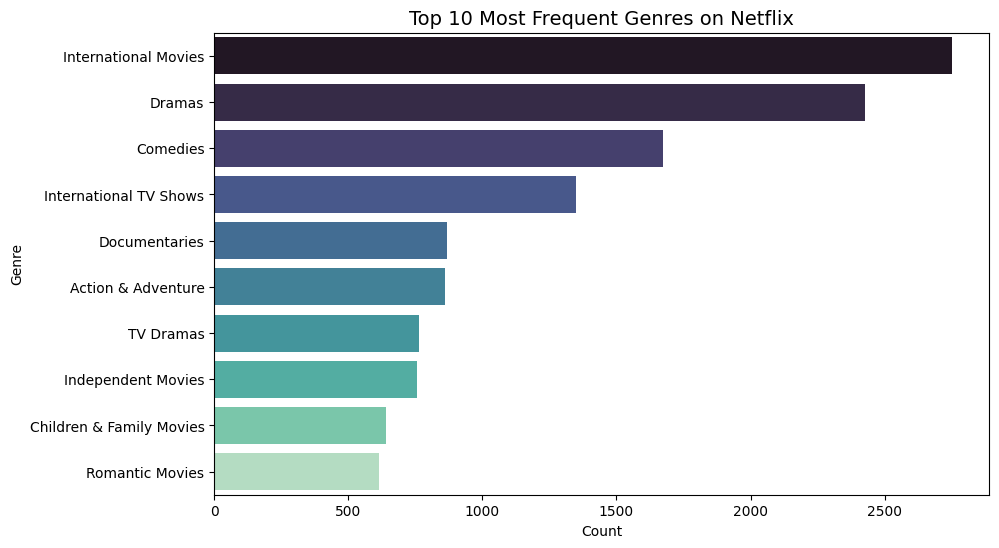

In [0]:
#  top 10 genres using pandas
from collections import Counter

# Split and flatten the 'listed_in' column to get all genres
all_genres = df_read['listed_in'].str.split(',').explode().str.strip()

# Count the occurrences of each genre
top_genres = all_genres.value_counts().head(10).reset_index()
top_genres.columns = ['Genre', 'Count']

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    y='Genre',
    x='Count',
    data=top_genres,
    hue='Genre',
    palette='mako',
    legend=False
)
plt.title('Top 10 Most Frequent Genres on Netflix', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

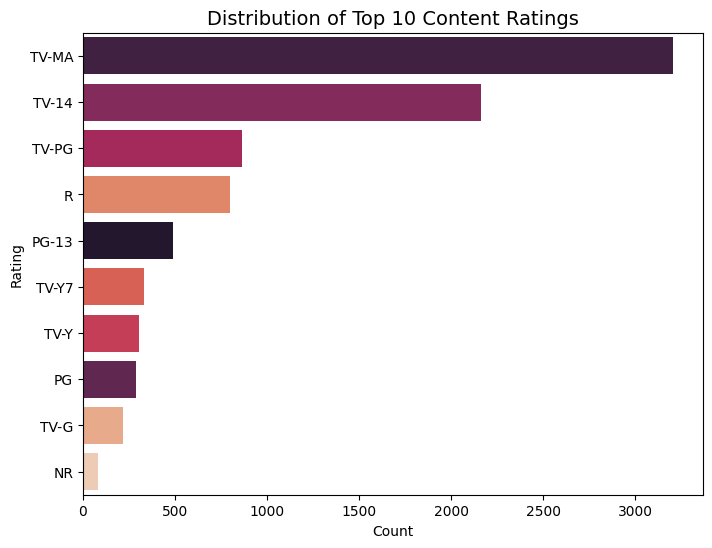

In [0]:
#  top 10 most frequent ratings
top_ratings = df_read['rating'].value_counts().head(10).index
filtered_df = df_read[df_read['rating'].isin(top_ratings)]

plt.figure(figsize=(8,6))
sns.countplot(
    y='rating',
    data=filtered_df,
    order=filtered_df['rating'].value_counts().index,
    palette='rocket',
    hue='rating',
    legend=False
)
plt.title('Distribution of Top 10 Content Ratings', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

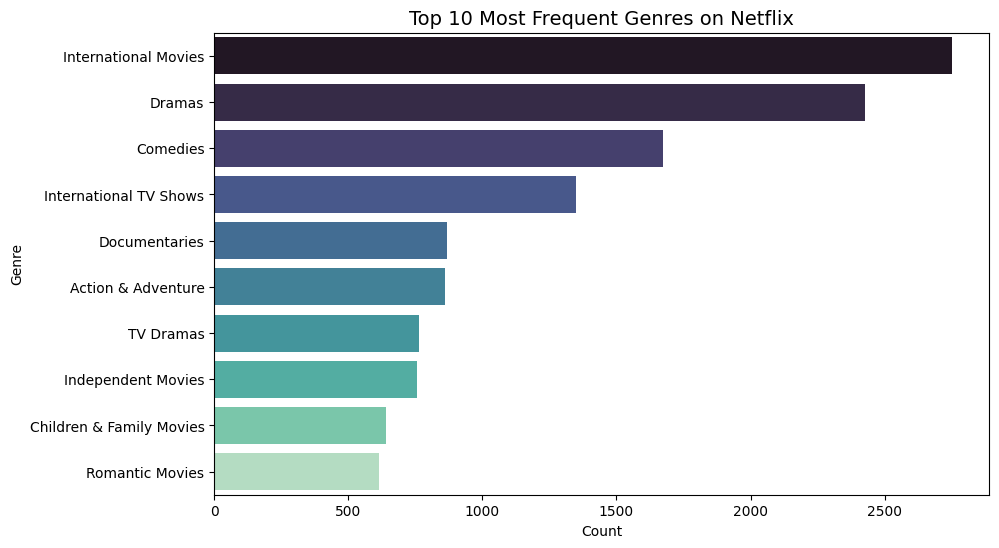

In [0]:
# Calculate top 10 genres using pandas
all_genres = df_read['listed_in'].str.split(',').explode().str.strip()
top_genres = all_genres.value_counts().head(10).reset_index()
top_genres.columns = ['Genre', 'Count']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    y="Genre",
    x="Count",
    data=top_genres,
    hue="Genre",
    palette="mako",
    legend=False
)
plt.title("Top 10 Most Frequent Genres on Netflix", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

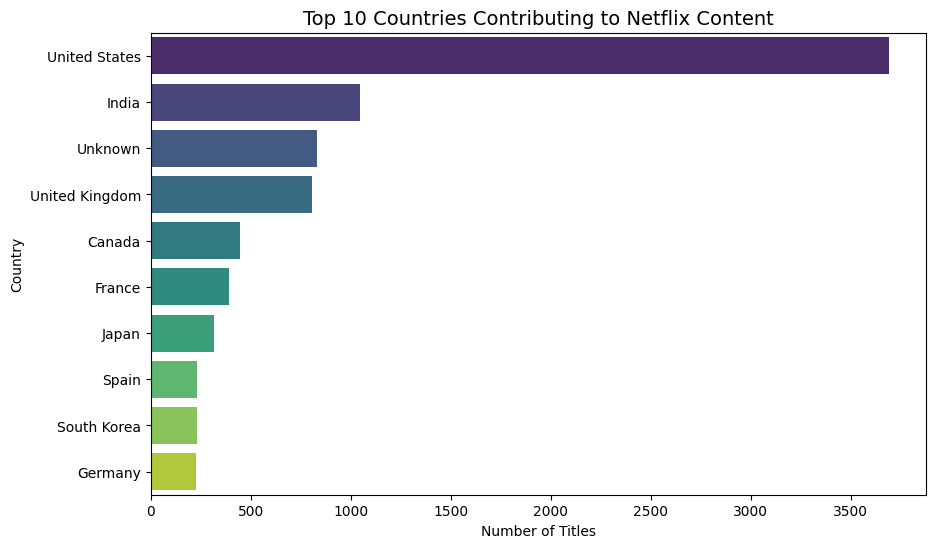

In [0]:
# Calculate top 10 countries contributing Netflix content
all_countries = df_read['country'].dropna().str.split(',').explode().str.strip()
top_countries = all_countries.value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    x=top_countries.values,
    y=top_countries.index,
    palette='viridis',
    hue=top_countries.index,
    legend=False
)
plt.title("Top 10 Countries Contributing to Netflix Content", fontsize=14)
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

title duration duration_num Content_Length_Category Dick Johnson Is Dead 90 min 90 Medium (1–2hrs) Blood & Water 2 Seasons 2 Short (<1hr) Ganglands 1 Season 1 Short (<1hr) Jailbirds New Orleans 1 Season 1 Short (<1hr) Kota Factory 2 Seasons 2 Short (<1hr) Midnight Mass 1 Season 1 Short (<1hr) My Little Pony: A New Generation 91 min 91 Medium (1–2hrs) Sankofa 125 min 125 Long (2–3hrs) The Great British Baking Show 9 Seasons 9 Short (<1hr) The Starling 104 min 104 Medium (1–2hrs) Vendetta: Truth, Lies and The Mafia 1 Season 1 Short (<1hr) Bangkok Breaking 1 Season 1 Short (<1hr) Je Suis Karl 127 min 127 Long (2–3hrs) Confessions of an Invisible Girl 91 min 91 Medium (1–2hrs) Crime Stories: India Detectives 1 Season 1 Short (<1hr) Dear White People 4 Seasons 4 Short (<1hr) Europe's Most Dangerous Man: Otto Skorzeny in Spain 67 min 67 Medium (1–2hrs) Falsa identidad 2 Seasons 2 Short (<1hr) Intrusion 94 min 94 Medium (1–2hrs) Jaguar 1 Season 1 Short (<1hr) Monsters Inside: The 24 Faces of Billy Milligan 1 Season 1 Short (<1hr) Resurrection: Ertugrul 5 Seasons 5 Short (<1hr) Avvai Shanmughi 161 min 161 Long (2–3hrs) Go! Go! Cory Carson: Chrissy Takes the Wheel 61 min 61 Medium (1–2hrs) Jeans 166 min 166 Long (2–3hrs) Love on the Spectrum 2 Seasons 2 Short (<1hr) Minsara Kanavu 147 min 147 Long (2–3hrs) Grown Ups 103 min 103 Medium (1–2hrs) Dark Skies 97 min 97 Medium (1–2hrs) Paranoia 106 min 106 Medium (1–2hrs) Ankahi Kahaniya 111 min 111 Medium (1–2hrs) Chicago Party Aunt 1 Season 1 Short (<1hr) Sex Education 3 Seasons 3 Short (<1hr) Squid Game 1 Season 1 Short (<1hr) Tayo and Little Wizards 1 Season 1 Short (<1hr) The Father Who Moves Mountains 110 min 110 Medium (1–2hrs) The Stronghold 105 min 105 Medium (1–2hrs) Angry Birds 1 Season 1 Short (<1hr) Birth of the Dragon 96 min 96 Medium (1–2hrs) Chhota Bheem 3 Seasons 3 Short (<1hr) He-Man and the Masters of the Universe 1 Season 1 Short (<1hr) Jaws 124 min 124 Long (2–3hrs) Jaws 2 116 min 116 Medium (1–2hrs) Jaws 3 98 min 98 Medium (1–2hrs) Jaws: The Revenge 91 min 91 Medium (1–2hrs) My Heroes Were Cowboys 23 min 23 Short (<1hr) Safe House 115 min 115 Medium (1–2hrs) The Smart Money Woman 1 Season 1 Short (<1hr) Training Day 122 min 122 Long (2–3hrs) Castle and Castle 2 Seasons 2 Short (<1hr) Dharmakshetra 1 Season 1 Short (<1hr) InuYasha the Movie 2: The Castle Beyond the Looking Glass 99 min 99 Medium (1–2hrs) InuYasha the Movie 3: Swords of an Honorable Ruler 99 min 99 Medium (1–2hrs) InuYasha the Movie 4: Fire on the Mystic Island 88 min 88 Medium (1–2hrs) InuYasha the Movie: Affections Touching Across Time 100 min 100 Medium (1–2hrs) Nailed It 6 Seasons 6 Short (<1hr) Naruto Shippuden the Movie: Blood Prison 102 min 102 Medium (1–2hrs) Naruto Shippûden the Movie: Bonds 93 min 93 Medium (1–2hrs) Naruto Shippûden the Movie: The Will of Fire 96 min 96 Medium (1–2hrs) Naruto Shippuden: The Movie 95 min 95 Medium (1–2hrs) Naruto Shippuden: The Movie: The Lost Tower 85 min 85 Medium (1–2hrs) Naruto the Movie 2: Legend of the Stone of Gelel 97 min 97 Medium (1–2hrs) Naruto the Movie 3: Guardians of the Crescent Moon Kingdom 95 min 95 Medium (1–2hrs) Naruto the Movie: Ninja Clash in the Land of Snow 83 min 83 Medium (1–2hrs) Nightbooks 103 min 103 Medium (1–2hrs) Numberblocks 6 Seasons 6 Short (<1hr) Raja Rasoi Aur Anya Kahaniyan 1 Season 1 Short (<1hr) Saved by the Bell 9 Seasons 9 Short (<1hr) Schumacher 113 min 113 Medium (1–2hrs) Stories by Rabindranath Tagore 1 Season 1 Short (<1hr) Too Hot To Handle: Latino 1 Season 1 Short (<1hr) A StoryBots Space Adventure 13 min 13 Short (<1hr) Jack Whitehall: Travels with My Father 5 Seasons 5 Short (<1hr) King of Boys 182 min 182 Long (2–3hrs) The World's Most Amazing Vacation Rentals 2 Seasons 2 Short (<1hr) You vs. Wild: Out Cold 106 min 106 Medium (1–2hrs) Yowamushi Pedal 1 Season 1 Short (<1hr) Little Singham - Black Shadow 48 min 48 Short (<1hr) Tughlaq Durbar 145 min 145 Long (2–3hrs) Tughlaq Durbar (Telugu) 145 min 145 Long (2–3hr

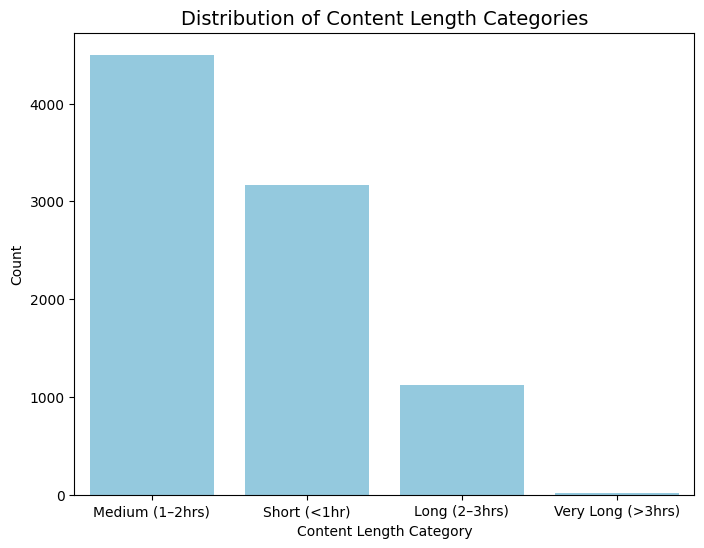

In [0]:

#Content Length
# Extract numeric duration
df_read['duration_num'] = pd.to_numeric(
    df_read['duration'].str.extract(r'(\d+)')[0], errors='coerce'
)

# Function for content length category
def content_length_category(duration):
    if pd.isnull(duration):
        return "Unknown"
    if duration <= 60:
        return "Short (<1hr)"
    elif 60 < duration <= 120:
        return "Medium (1–2hrs)"
    elif 120 < duration <= 200:
        return "Long (2–3hrs)"
    elif duration > 200:
        return "Very Long (>3hrs)"
    else:
        return "Unknown"

df_read['Content_Length_Category'] = df_read['duration_num'].apply(content_length_category)

# Show all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

display(df_read[['title', 'duration', 'duration_num', 'Content_Length_Category']])

# Plot distribution without FutureWarning
plt.figure(figsize=(8,6))
sns.countplot(
    x='Content_Length_Category',
    data=df_read,
    color='skyblue'  # Single color avoids hue warning
)
plt.title("Distribution of Content Length Categories", fontsize=14)
plt.xlabel("Content Length Category")
plt.ylabel("Count")
plt.show()



title Original_vs_Licensed Dick Johnson Is Dead Licensed Blood & Water Licensed Ganglands Licensed Jailbirds New Orleans Licensed Kota Factory Licensed Midnight Mass Licensed My Little Pony: A New Generation Licensed Sankofa Licensed The Great British Baking Show Licensed The Starling Licensed Vendetta: Truth, Lies and The Mafia Licensed Bangkok Breaking Licensed Je Suis Karl Licensed Confessions of an Invisible Girl Licensed Crime Stories: India Detectives Licensed Dear White People Licensed Europe's Most Dangerous Man: Otto Skorzeny in Spain Licensed Falsa identidad Licensed Intrusion Licensed Jaguar Licensed Monsters Inside: The 24 Faces of Billy Milligan Licensed Resurrection: Ertugrul Licensed Avvai Shanmughi Licensed Go! Go! Cory Carson: Chrissy Takes the Wheel Licensed Jeans Licensed Love on the Spectrum Licensed Minsara Kanavu Licensed Grown Ups Licensed Dark Skies Licensed Paranoia Licensed Ankahi Kahaniya Licensed Chicago Party Aunt Licensed Sex Education Licensed Squid Game Licensed Tayo and Little Wizards Licensed The Father Who Moves Mountains Licensed The Stronghold Licensed Angry Birds Licensed Birth of the Dragon Licensed Chhota Bheem Licensed He-Man and the Masters of the Universe Licensed Jaws Licensed Jaws 2 Licensed Jaws 3 Licensed Jaws: The Revenge Licensed My Heroes Were Cowboys Licensed Safe House Licensed The Smart Money Woman Licensed Training Day Licensed Castle and Castle Licensed Dharmakshetra Licensed InuYasha the Movie 2: The Castle Beyond the Looking Glass Licensed InuYasha the Movie 3: Swords of an Honorable Ruler Licensed InuYasha the Movie 4: Fire on the Mystic Island Licensed InuYasha the Movie: Affections Touching Across Time Licensed Nailed It Licensed Naruto Shippuden the Movie: Blood Prison Licensed Naruto Shippûden the Movie: Bonds Licensed Naruto Shippûden the Movie: The Will of Fire Licensed Naruto Shippuden: The Movie Licensed Naruto Shippuden: The Movie: The Lost Tower Licensed Naruto the Movie 2: Legend of the Stone of Gelel Licensed Naruto the Movie 3: Guardians of the Crescent Moon Kingdom Licensed Naruto the Movie: Ninja Clash in the Land of Snow Licensed Nightbooks Licensed Numberblocks Licensed Raja Rasoi Aur Anya Kahaniyan Licensed Saved by the Bell Licensed Schumacher Licensed Stories by Rabindranath Tagore Licensed Too Hot To Handle: Latino Licensed A StoryBots Space Adventure Licensed Jack Whitehall: Travels with My Father Licensed King of Boys Licensed The World's Most Amazing Vacation Rentals Licensed You vs. Wild: Out Cold Licensed Yowamushi Pedal Licensed Little Singham - Black Shadow Licensed Tughlaq Durbar Licensed Tughlaq Durbar (Telugu) Licensed Firedrake the Silver Dragon Licensed Kate Licensed Lucifer Licensed Metal Shop Masters Licensed Omo Ghetto: the Saga Licensed Pokémon Master Journeys: The Series Licensed Prey Licensed Titipo Titipo Licensed Blood Brothers: Malcolm X & Muhammad Ali Licensed Mighty Raju Licensed Paradise Hills Licensed The Women and the Murderer Licensed Into the Night Licensed JJ+E Licensed Show Dogs Licensed The Circle Licensed If I Leave Here Tomorrow: A Film About Lynyrd Skynyrd Licensed Kid Cosmic Licensed Octonauts: Above & Beyond Licensed On the Verge Licensed Tobot Galaxy Detectives Licensed Untold: Breaking Point Licensed Countdown: Inspiration4 Mission to Space Licensed Shadow Parties Licensed Tayo the Little Bus Licensed Angamaly Diaries Licensed Bunk'd Licensed A Champion Heart Licensed Dive Club Licensed La casa de papel Licensed Money Heist: From Tokyo to Berlin Licensed Sharkdog Licensed Worth Licensed Afterlife of the Party Licensed Anjaam Licensed Bright Star Licensed Dhanak Licensed Final Account Licensed Gurgaon Licensed Here and There Licensed Heroes of Goo Jit Zu Licensed Hotel Del Luna Licensed In the Cut Licensed Luv Kushh Licensed Pororo - The Little Penguin Licensed Q-Force Licensed Shikara Licensed A Cinderella Story Licensed Agatha Christie's Crooked House Licensed An Unfinished Life Licensed Barbie Big City Big Dre

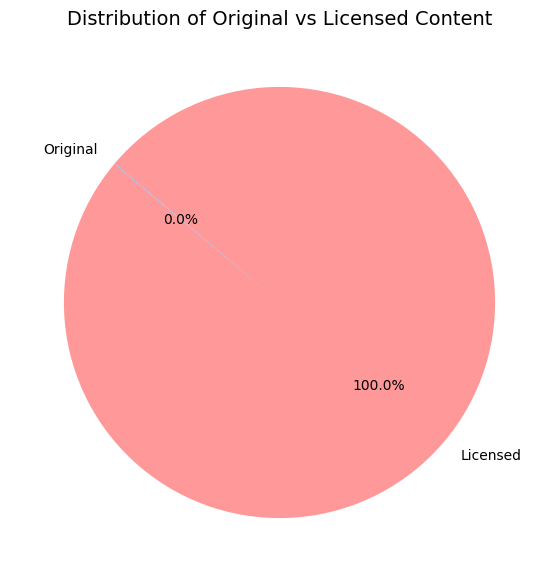

In [0]:
#Feature Engineering - Original vs Licensed
def original_vs_licensed(title):
    if "Netflix" in str(title):
        return "Original"
    else:
        return "Licensed"

df_read['Original_vs_Licensed'] = df_read['title'].apply(original_vs_licensed)

# Show all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(df_read[['title', 'Original_vs_Licensed']])

# Pie chart for Original vs Licensed
counts = df_read['Original_vs_Licensed'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Original vs Licensed Content', fontsize=14)
plt.show()

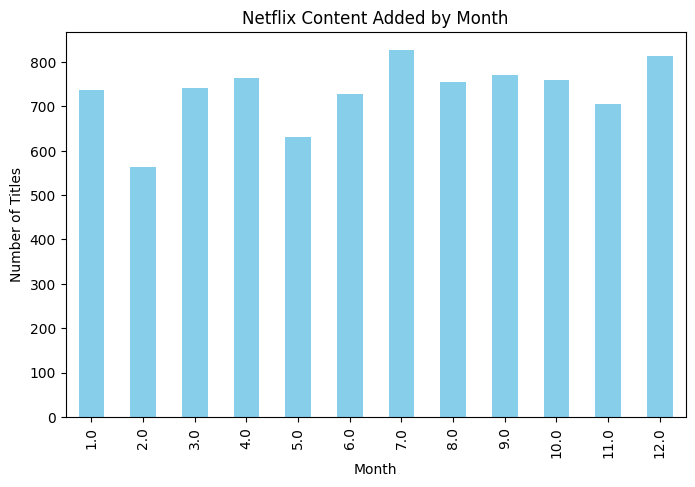

In [0]:
#content growth by month
# Ensure 'date_added' is datetime
df_read['date_added'] = pd.to_datetime(df_read['date_added'], errors='coerce')

# Group by month and plot
monthly_counts = df_read.groupby(df_read['date_added'].dt.month).size()
monthly_counts.plot(
    kind='bar',
    figsize=(8, 5),
    color='skyblue'
)
plt.title("Netflix Content Added by Month")
plt.xlabel("Month")
plt.ylabel("Number of Titles")
plt.show()

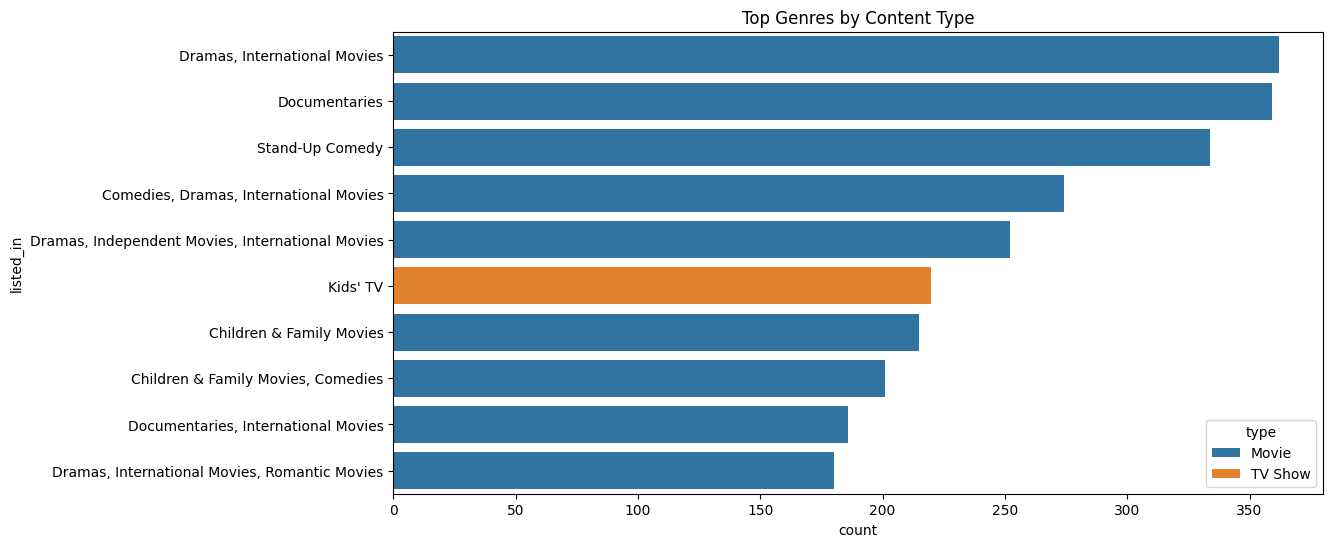

In [0]:
#genre vs content type
plt.figure(figsize=(12,6))
sns.countplot(y='listed_in', hue='type', data=df_read, order=df_read['listed_in'].value_counts().iloc[:10].index)
plt.title("Top Genres by Content Type")
plt.show()


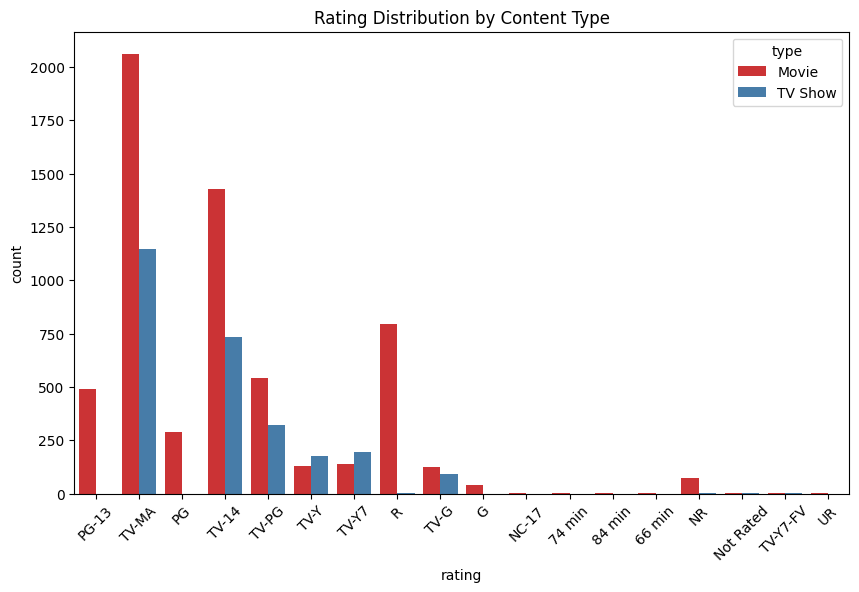

In [0]:
#rating distrubution by content type
plt.figure(figsize=(10,6))
sns.countplot(x='rating', hue='type', data=df_read, palette='Set1')
plt.title("Rating Distribution by Content Type")
plt.xticks(rotation=45)
plt.show()



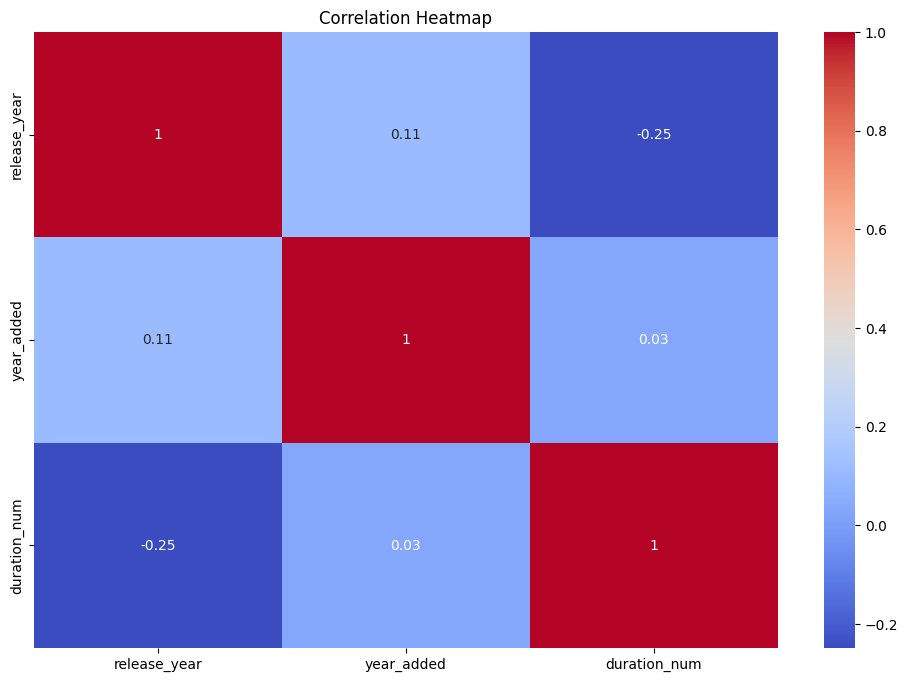

In [0]:
numeric_df = df_read.select_dtypes(include=['float64','int64'])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [0]:
df_read.to_csv("/Volumes/workspace/default/netflix/netflix_feature_eda.csv", index=False)
print("Feature engineered dataset saved successfully.")


Feature engineered dataset saved successfully.
